In [10]:
import pandas as pd

from datetime import datetime, timedelta
import time
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

# Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, 
# чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

In [11]:
raw=pd.read_csv('stud_math.xls')
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [12]:
def compare_two_populations(sample1, sample2,alpha,sample_size):
    stat, p = ttest_ind(sample1,sample2)
   
    if p> alpha:
        print('популяции одинаковые, нулевую гипотезу опровергнуть не удалось')
    else:
        print('популяции отличаются, нулевую гипотезу опровергнуть удалось')
    return 

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

 # первичная обработка данных

In [5]:
raw.isnull().sum()       #Какие колонки содержат сколько нулевых значений

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

In [13]:
raw.dtypes

school                  object
sex                     object
age                      int64
address                 object
famsize                 object
Pstatus                 object
Medu                   float64
Fedu                   float64
Mjob                    object
Fjob                    object
reason                  object
guardian                object
traveltime             float64
studytime              float64
failures               float64
schoolsup               object
famsup                  object
paid                    object
activities              object
nursery                 object
studytime, granular    float64
higher                  object
internet                object
romantic                object
famrel                 float64
freetime               float64
goout                  float64
health                 float64
absences               float64
score                  float64
dtype: object

In [14]:
raw.select_dtypes(include=['object']) 

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,NaN,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,NaN,no
1,GP,F,U,GT3,NaN,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,NaN,no,yes,yes,yes,NaN
3,GP,F,U,GT3,T,health,NaN,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,NaN,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,NaN,NaN,no,no,no,no,NaN,no,no
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,NaN,no,yes,yes,no


In [15]:
raw.select_dtypes(include=['float64','int64'])

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
0,18,4.0,4.0,2.0,2.0,0.0,-6.0,4.0,3.0,4.0,3.0,6.0,30.0
1,17,1.0,1.0,1.0,2.0,0.0,-6.0,5.0,3.0,3.0,3.0,4.0,30.0
2,15,1.0,1.0,1.0,2.0,3.0,-6.0,4.0,3.0,2.0,3.0,10.0,50.0
3,15,4.0,2.0,1.0,3.0,0.0,-9.0,3.0,2.0,2.0,5.0,2.0,75.0
4,16,3.0,3.0,1.0,2.0,0.0,-6.0,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2.0,2.0,1.0,2.0,2.0,-6.0,5.0,5.0,4.0,4.0,212.0,45.0
391,17,3.0,1.0,2.0,1.0,0.0,-3.0,2.0,4.0,5.0,2.0,3.0,80.0
392,21,1.0,1.0,1.0,1.0,3.0,-3.0,5.0,5.0,3.0,3.0,3.0,35.0
393,18,3.0,2.0,3.0,1.0,0.0,-3.0,4.0,4.0,1.0,5.0,0.0,50.0


# Score 

In [16]:
raw['score'].isnull().sum()  #Главный целевой показатель содержит пропуски

6

In [17]:
raw[raw['score'].isnull()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
201,GP,F,16,U,GT3,T,2.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,yes,yes,NaN,yes,yes,-6.0,yes,no,no,4.0,NaN,3.0,4.0,6.0,NaN
244,GP,F,18,U,GT3,T,2.0,1.0,other,other,course,other,2.0,3.0,0.0,no,yes,yes,no,no,-9.0,yes,yes,yes,4.0,4.0,4.0,3.0,0.0,NaN
270,GP,F,19,NaN,GT3,T,3.0,3.0,other,services,home,other,1.0,2.0,2.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,3.0,5.0,5.0,NaN,NaN
283,GP,F,18,U,GT3,T,1.0,1.0,other,other,home,mother,2.0,2.0,0.0,yes,NaN,no,yes,yes,-6.0,yes,yes,no,5.0,NaN,4.0,4.0,4.0,NaN
312,GP,M,19,U,GT3,T,1.0,2.0,other,services,course,other,1.0,2.0,1.0,no,no,no,no,no,-6.0,yes,yes,no,4.0,5.0,NaN,4.0,3.0,NaN
350,MS,M,19,NaN,GT3,T,1.0,1.0,other,services,home,other,3.0,2.0,3.0,no,no,no,no,NaN,-6.0,yes,yes,no,5.0,4.0,4.0,2.0,8.0,NaN


In [18]:
display(raw.shape)
raw.dropna(subset=['score'], how='all',inplace=True)  #удалим эти строки
display(raw.shape)

(395, 30)

(389, 30)

In [19]:
raw['score'].describe()  #Аккуратные данные, без выбросов

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

# School

In [7]:
raw['school'].isnull().sum()  # Данные не содержат пропущенных значений.

0

In [30]:
school_df=raw[['school','score']]

In [31]:
school_df['school'].value_counts()   # Только две школы, причём в основном все данные из одной школы

GP    344
MS     45
Name: school, dtype: int64

In [32]:
school_df.groupby(['school'])['score'].mean() # первая школа слегка успешеней второй, но от неё в 7 раз больше данных, поэтому не считается


school
GP    52.630814
MS    49.444444
Name: score, dtype: float64

In [ ]:
# Школу как фактор успешности засчитывать нельзя из-за разницы в объёме предоставленных данных

# Gender

In [3]:
raw['sex'].isnull().sum()  # Данные не содержат пропущенных значений.

0

In [4]:
gender_df=raw[['sex','score']]

In [37]:
gender_df['sex'].value_counts()  #Мальчиков и девочек примерно поровну

F    204
M    185
Name: sex, dtype: int64

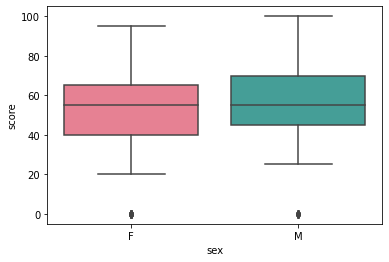

In [46]:
sns.boxplot(y='score', x='sex', data=gender_df, palette='husl')

# Age

In [20]:
raw['age'].isnull().sum()  # Данные не содержат пропущенных значений.

0

In [21]:
age_df=raw[['age','sex','score']]

In [22]:
age_df['age'].value_counts()  # данные для возраста больше 19 лучше не рассматривать, не информативно

16    103
17     98
15     82
18     80
19     21
20      3
22      1
21      1
Name: age, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

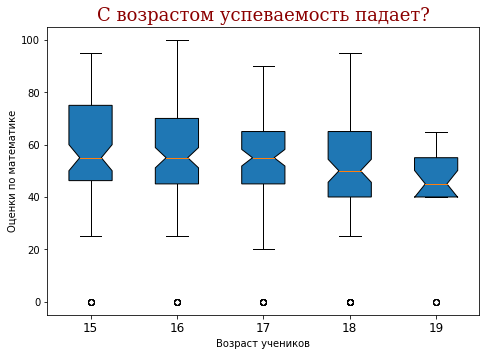

In [27]:
figure_age=plt.figure()
age_axes=figure_age.add_axes([0,0,1,1])

age_plot1=age_df[age_df['age']==15]['score']
age_plot2=age_df[age_df['age']==16]['score']
age_plot3=age_df[age_df['age']==17]['score']
age_plot4=age_df[age_df['age']==18]['score']
age_plot5=age_df[age_df['age']==19]['score']

age_axes.boxplot([age_plot1,age_plot2,age_plot3,age_plot4,age_plot5],notch=True,patch_artist=True)
font_t = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 18}
        
age_axes.set_title('C возрастом успеваемость падает?' ,fontdict=font_t)
age_axes.set(xlabel='Возраст учеников', ylabel='Оценки по математике')
age_axes.set_xticklabels(['15','16','17','18','19'], fontsize=12)
           
plt.show

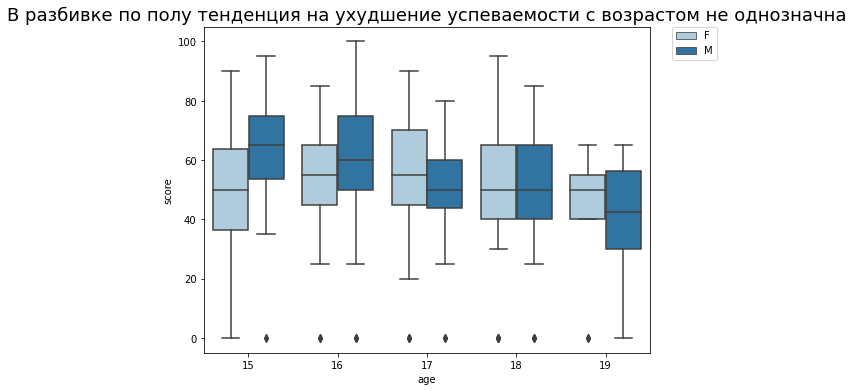

In [41]:
plt.figure(figsize=(8,6))
#sns.boxplot(x='day',y='tip',data=df,hue='smoker')
age_plot2=sns.boxplot(x='age',  y='score',  hue='sex',
                      data=age_df[age_df['age']<20], 
                      palette='Paired')
age_plot2.set_title('В разбивке по полу тенденция на ухудшение успеваемости с возрастом не однозначна', fontsize=18)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Urban vs Rural

In [89]:
display(raw['address'].isnull().sum())    # Данные содержат 15 пропущенных значений.
raw.shape

17

(395, 30)

In [90]:
ur=raw.fillna(0)
ur=ur[['address','score']]
display(ur.shape)

(395, 2)

In [91]:
ur['address'].value_counts()

U    295
R     83
0     17
Name: address, dtype: int64

In [92]:
ur.groupby(['address'])['score'].mean() # интересно, что средняя оценка по ученикам, адрес которых неизвестен, выше.
#Это может влияет на результат


address
0    49.705882
R    46.927711
U    52.847458
Name: score, dtype: float64

In [93]:
ur[ur['address']=='U'].describe()

,score
count,295.000000
mean,52.847458
std,23.503375
min,0.000000
25%,45.000000
50%,55.000000
75%,70.000000
max,100.000000


In [94]:
ur[ur['address']=='R'].describe()

,score
count,83.000000
mean,46.927711
std,23.148926
min,0.000000
25%,35.000000
50%,50.000000
75%,60.000000
max,95.000000


[Text(0, 0, 'Urban'), Text(0, 0, 'Rural')]

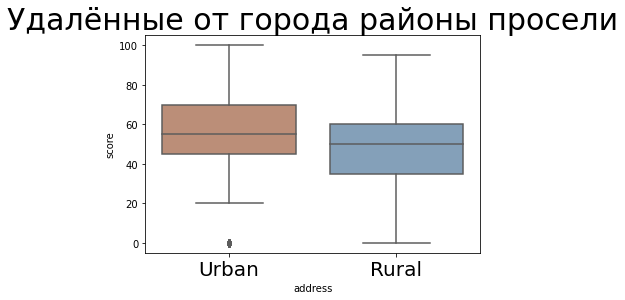

In [95]:
ur_plot=sns.boxplot(y='score', x='address', data=ur[ur['address']!=0], palette='twilight_shifted_r')
ur_plot.set_title('Удалённые от города районы просели', fontsize=30)
ur_plot.set_xticklabels(['Urban', 'Rural'], fontsize=20)

# Family size

In [ ]:
5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

In [128]:
raw['famsize'].isnull().sum()  # Данные содержат 27 пропущенных значений.

27

In [131]:
fam_size=raw.fillna(0)
fam_size=fam_size[['famsize','address','score',]]

In [135]:
fam_size['famsize'].value_counts()

GT3    255
LE3    107
0       27
Name: famsize, dtype: int64

In [139]:
fam_size.groupby(['famsize'])['score'].mean() # интересно, что средняя оценка по ученикам, размер семьи которых неизвестен, ниже.


famsize
0      49.814815
GT3    51.509804
LE3    54.672897
Name: score, dtype: float64

In [136]:
fam_size[fam_size['famsize']=='GT3'].describe() # Greater than 3

,score
count,255.000000
mean,51.509804
std,23.388513
min,0.000000
25%,40.000000
50%,55.000000
75%,70.000000
max,100.000000


In [137]:
fam_size[fam_size['famsize']=='LE3'].describe() # Less than 3

,score
count,107.000000
mean,54.672897
std,21.360242
min,0.000000
25%,45.000000
50%,55.000000
75%,67.500000
max,95.000000


[Text(0, 0, 'Greater than 3'), Text(0, 0, 'Less than 3')]

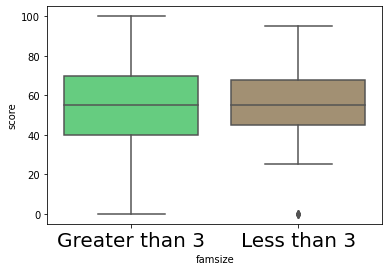

In [140]:
fs_plot=sns.boxplot(y='score', x='famsize', data=fam_size[fam_size['famsize']!=0], palette='terrain')
fs_plot.set_title('', fontsize=30)
fs_plot.set_xticklabels(['Greater than 3', 'Less than 3'], fontsize=20)

#Разброс значений в семье больше 3 человек выше, это значит, что какие-то другие факторы, ассоциированные с размером семьи, являются определяющими

In [149]:
fam_size[fam_size['address']!=0] #fam_size[fam_size['famsize']!=0 & fam_size['address']!=0]

,famsize,address,score
0,0,U,30.0
1,GT3,U,30.0
2,LE3,U,50.0
3,GT3,U,75.0
4,GT3,U,50.0
...,...,...,...
390,LE3,U,45.0
391,LE3,U,80.0
392,GT3,R,35.0
393,LE3,R,50.0


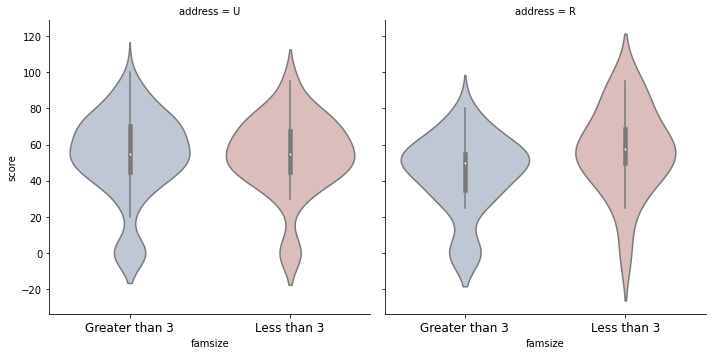

In [223]:
fsu_plot= sns.catplot(x='famsize', y='score',
                col='address', data=fam_size[(fam_size['famsize']!=0) & (fam_size['address']!=0)], kind="violin", palette='vlag') # hue="address"
fsu_plot.set_xticklabels(['Greater than 3', 'Less than 3'], fontsize=12)

#В городских условиях большие семьи явно положительно влияют на успеваемость, возможно связано с трудноизмеряемыми факторами как мотивация и/или социоэкономическими условиями больших семей

[Text(0, 0, 'Greater than 3'), Text(0, 0, 'Less than 3')]

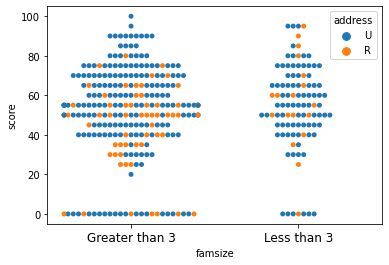

In [162]:
fsu_plot1= sns.swarmplot(x='famsize', y='score',hue='address', data=fam_size[(fam_size['famsize']!=0) & (fam_size['address']!=0)]) 
fsu_plot1.set_xticklabels(['Greater than 3', 'Less than 3'], fontsize=12)

# Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

In [43]:
raw['Pstatus'].isnull().sum()  # Данные содержат 45 пропущенных значений.

45

In [44]:
co_living=raw.fillna(0)
co_living=co_living[['Pstatus','famsize','score',]]

In [168]:
co_living['Pstatus'].value_counts()

T    308
0     45
A     36
Name: Pstatus, dtype: int64

In [45]:
co_living.groupby(['Pstatus'])['score'].mean()

Pstatus
0    53.777778
A    55.138889
T    51.704545
Name: score, dtype: float64

In [170]:
co_living[co_living['Pstatus']=='A'].describe() # Раздельное проживание родителей

,score
count,36.000000
mean,55.138889
std,22.312268
min,0.000000
25%,45.000000
50%,55.000000
75%,66.250000
max,95.000000


In [171]:
co_living[co_living['Pstatus']=='T'].describe() # Совместное проживание родителей

,score
count,308.000000
mean,51.704545
std,22.970035
min,0.000000
25%,40.000000
50%,55.000000
75%,70.000000
max,100.000000


Text(0.5, 1.0, 'Большая вариативность результатов у учеников из раздельно проживающих семей ')

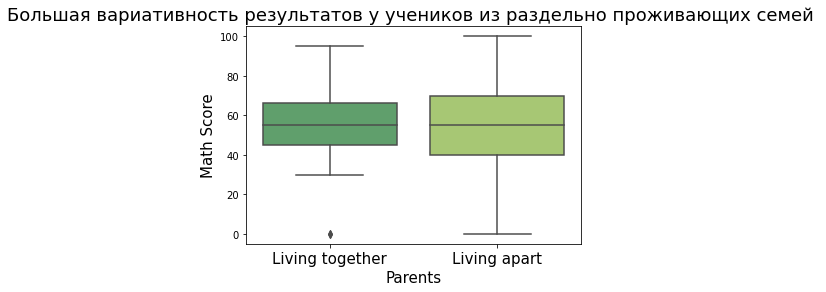

In [51]:
living_plot=sns.boxplot(y='score', x='Pstatus', data=co_living[co_living['Pstatus']!=0], palette='summer')
living_plot.set_title('', fontsize=30)
living_plot.set_xticklabels(['Living together', 'Living apart'], fontsize=15)
living_plot.set_xlabel('Parents',fontdict={'fontsize':15})
living_plot.set_ylabel('Math Score',fontdict={'fontsize':15})
living_plot.set_title('Большая вариативность результатов у учеников из раздельно проживающих семей ', fontsize=18)

Text(0.5, 1.1, 'Дифференциация по размеру семьи')

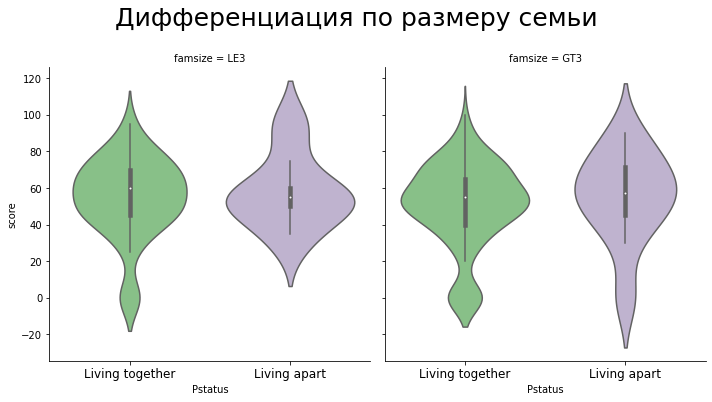

In [47]:
living_plot1= sns.catplot(x='Pstatus', y='score',
                col='famsize', data=co_living[(co_living['Pstatus']!=0) & (co_living['famsize']!=0)],kind="violin", palette='Accent') # hue="address"
living_plot1.set_xticklabels(['Living together', 'Living apart'], fontsize=12)
#living_plot1.set_xlabel('Parents',fontdict={'fontsize':15})
#living_plot1.set_ylabel('Math Score',fontdict={'fontsize':15})
living_plot1.fig.suptitle('Дифференциация по размеру семьи', y=1.1, fontsize=25)

#Ученики из больших семей с раздельным проживанием показывают бОлбшую вариативность результатов

# Parents Education and Job

In [ ]:
7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)


In [67]:
parents_info={'Medu':'образование матери','Fedu':'образование отца', 'Mjob':'работа матери','Fjob':'работа отца'}
education={'0':'без образования', '1': '4 класса', '2':'5-9 классы', '3':'среднее специальное или 11 классов', '4':'высшее'}

for keys, value in parents_info.items():
    print('Данные ',value, ' содержат ',raw[keys].isnull().sum(),' пропущенных значений')

Данные  образование матери  содержат  3  пропущенных значений
Данные  образование отца  содержат  24  пропущенных значений
Данные  работа матери  содержат  19  пропущенных значений
Данные  работа отца  содержат  36  пропущенных значений


In [68]:
parent_ed_job=raw[['Medu','Fedu','Mjob','Fjob','score']] # working DataFRame

for keys, value in parents_info.items():
    print('Фактор',value, ' разделяется на следующие категории:\n',parent_ed_job[keys].value_counts(sort=False))

    print('Средние значения оценки по категориям ',value, ': \n',parent_ed_job.groupby([keys])['score'].mean())
 

Фактор образование матери  разделяется на следующие категории:
 4.0    131
1.0     59
3.0     97
2.0    102
0.0      3
Name: Medu, dtype: int64
Средние значения оценки по категориям  образование матери : 
 Medu
0.0    65.000000
1.0    43.125000
2.0    49.600000
3.0    51.822917
4.0    58.816794
Name: score, dtype: float64
Фактор образование отца  разделяется на следующие категории:
 4.0      88
1.0      78
2.0     106
3.0      96
40.0      1
0.0       2
Name: Fedu, dtype: int64
Средние значения оценки по категориям  образование отца : 
 Fedu
0.0     65.000000
1.0     46.333333
2.0     51.761905
3.0     54.042553
4.0     55.681818
40.0    60.000000
Name: score, dtype: float64
Фактор работа матери  разделяется на следующие категории:
 health       32
services     98
teacher      55
at_home      58
other       133
Name: Mjob, dtype: int64
Средние значения оценки по категориям  работа матери : 
 Mjob
at_home     45.689655
health      60.625000
other       49.527559
services    54.744898
te

In [69]:
#Правим ошибку ввода в образовании отца
parent_ed_job.Fedu=parent_ed_job['Fedu'].apply(lambda x: 4.0 if str(x)=='40.0' else x)

In [70]:
for keys, value in parents_info.items():
    print('Фактор',value, ' разделяется на следующие категории:\n',parent_ed_job[keys].value_counts(sort=False))

    print('Средние значения оценки по математике по категориям ',value, ': \n',parent_ed_job.groupby([keys])['score'].mean(),'\n')

Фактор образование матери  разделяется на следующие категории:
 4.0    131
1.0     59
3.0     97
2.0    102
0.0      3
Name: Medu, dtype: int64
Средние значения оценки по математике по категориям  образование матери : 
 Medu
0.0    65.000000
1.0    43.125000
2.0    49.600000
3.0    51.822917
4.0    58.816794
Name: score, dtype: float64 

Фактор образование отца  разделяется на следующие категории:
 4.0     89
1.0     78
2.0    106
3.0     96
0.0      2
Name: Fedu, dtype: int64
Средние значения оценки по математике по категориям  образование отца : 
 Fedu
0.0    65.000000
1.0    46.333333
2.0    51.761905
3.0    54.042553
4.0    55.730337
Name: score, dtype: float64 

Фактор работа матери  разделяется на следующие категории:
 health       32
services     98
teacher      55
at_home      58
other       133
Name: Mjob, dtype: int64
Средние значения оценки по математике по категориям  работа матери : 
 Mjob
at_home     45.689655
health      60.625000
other       49.527559
services    54.744

In [71]:
def replace(key):
    education={'0':'без образования', '1': '4 класса', '2':'5-9 классы', '3':'ср.-спец./ 11 кл', '4':'высшее'}
    if str(key)!='nan':
        replacement=education[str(int(key))]
    else:
        replacement=key
    return replacement

In [72]:
parent_ed_job.loc[:,'Medu']=parent_ed_job.loc[:,'Medu'].apply(replace) #(lambda x: education[str(int(key))] if str(x)!='nan' else x)

In [73]:
parent_ed_job.loc[:,'Fedu']=parent_ed_job.loc[:,'Fedu'].apply(lambda x: None if 'n' in str(x) else education[str(int(x))])

In [74]:
parent_ed_job=parent_ed_job.fillna(0)

In [75]:
parent_ed_job.isnull().sum()  

Medu     0
Fedu     0
Mjob     0
Fjob     0
score    0
dtype: int64

In [76]:
parent_ed_job['Medu'].value_counts()  

высшее              131
5-9 классы          102
ср.-спец./ 11 кл     97
4 класса             59
без образования       3
0                     3
Name: Medu, dtype: int64

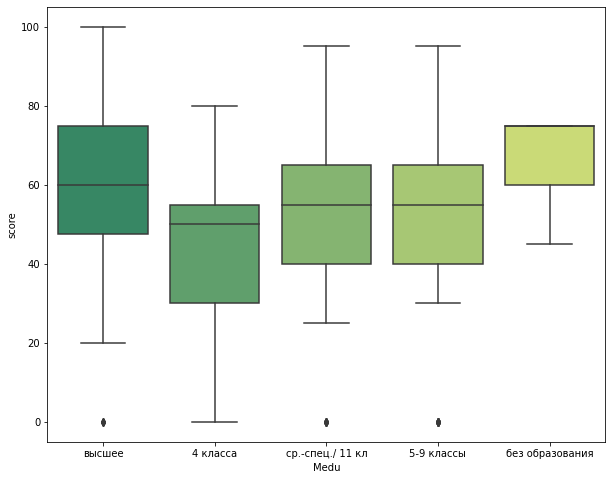

In [141]:
plt.figure(figsize=(10,8))
mother_influence=sns.boxplot(y='score', x='Medu', data=parent_ed_job[parent_ed_job['Medu']!=0], palette='summer')


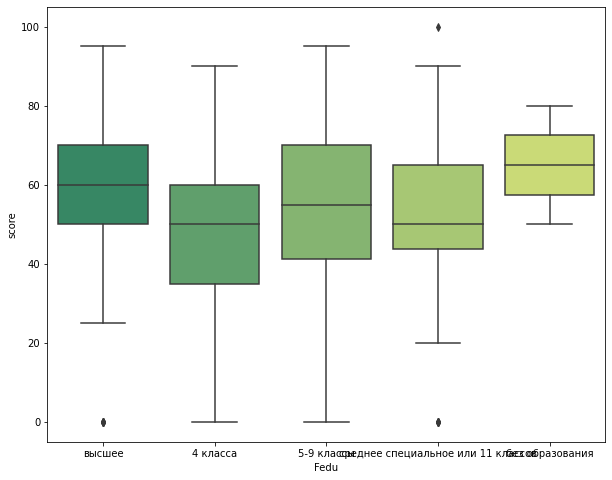

In [142]:
plt.figure(figsize=(10,8))
father_influence=sns.boxplot(y='score', x='Fedu', data=parent_ed_job[parent_ed_job['Fedu']!=0], palette='summer')

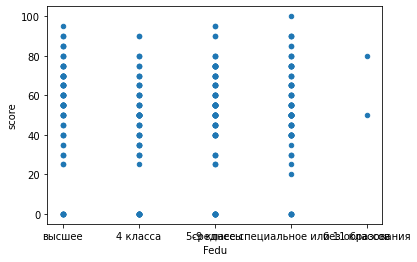

In [131]:
parent_ed_job[(parent_ed_job['Fedu']!=0)][['Fedu', 'score']].plot(x='Fedu',y= 'score',kind = 'scatter')

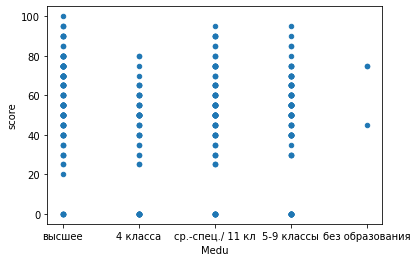

In [26]:
parent_ed_job[(parent_ed_job['Medu']!=0)][['Medu', 'score']].plot(x='Medu',y= 'score',kind = 'scatter')

<function matplotlib.pyplot.show(*args, **kw)>

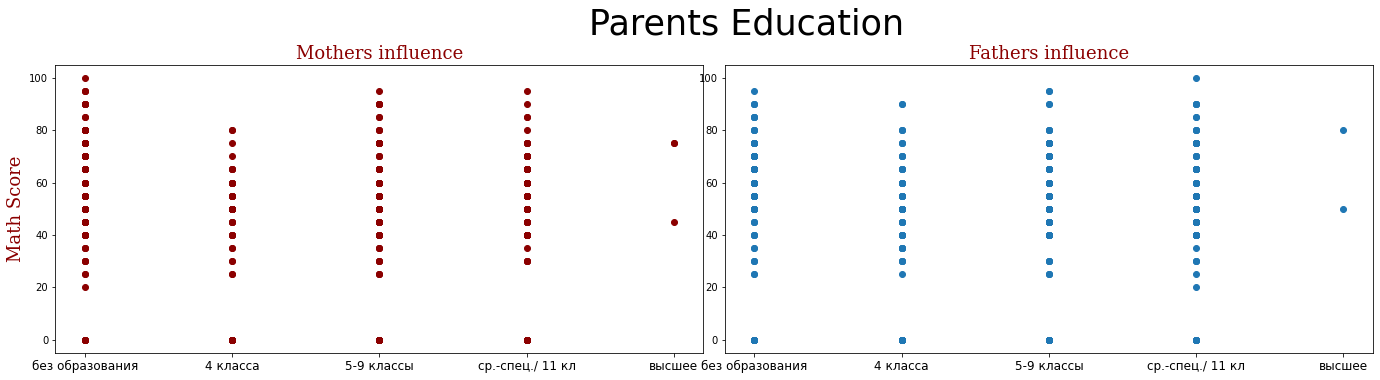

In [77]:
figure1=plt.figure() #constrained_layout=True
f_axes=figure1.add_axes([0,0,1.5,1])
s_axes=figure1.add_axes([1.55,0,1.5,1])
figure1.suptitle('Parents Education', x=1.6 , y=1.2, fontsize=35)

x1=parent_ed_job[parent_ed_job['Medu']!=0]['Medu'].values.tolist()
y1=parent_ed_job[parent_ed_job['Medu']!=0]['score'].values.tolist()

f_axes.scatter(x1,y1,c='darkred')
           

font_t = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 18}
        
f_axes.set_title('Mothers influence' ,fontdict=font_t)
f_axes.set_ylabel('Math Score' ,fontdict=font_t)
f_axes.set(xlabel='', ylabel='Math Score')
f_axes.set_xticklabels(['без образования', '4 класса', '5-9 классы', 'ср.-спец./ 11 кл','высшее'], fontsize=12)

x2=parent_ed_job[parent_ed_job['Fedu']!=0]['Fedu'].values.tolist()
y2=parent_ed_job[(parent_ed_job['Fedu']!=0)]['score'].values.tolist()

s_axes.scatter(x2,y2)

s_axes.set_title('Fathers influence' ,fontdict=font_t)
s_axes.set_xticklabels(['без образования', '4 класса', '5-9 классы', 'ср.-спец./ 11 кл','высшее'], fontsize=12)
           

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

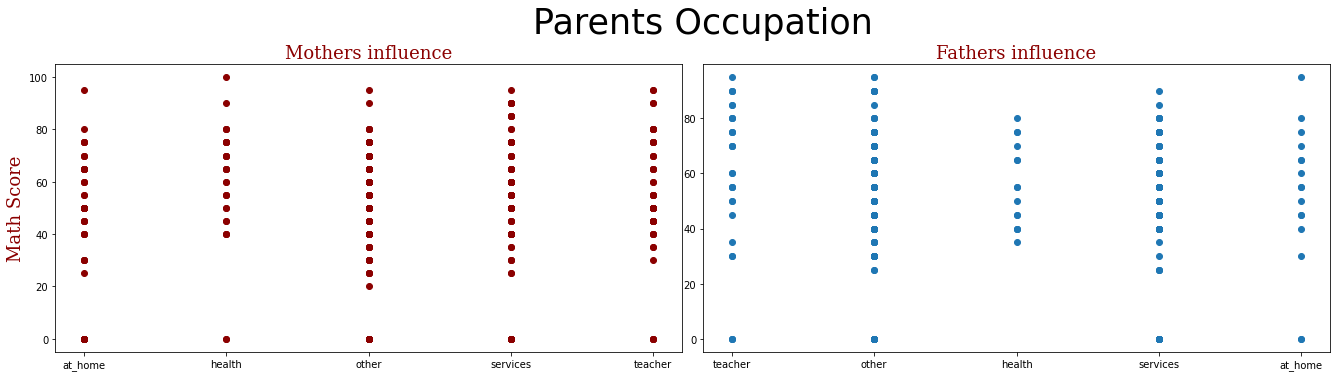

In [78]:
figure5=plt.figure()
mo_axes=figure5.add_axes([0,0,1.45,1])
fa_axes=figure5.add_axes([1.5,0,1.45,1])
figure5.suptitle('Parents Occupation', x=1.5 , y=1.2, fontsize=35)


x1=parent_ed_job[parent_ed_job['Mjob']!=0]['Mjob'].values.tolist()
y1=parent_ed_job[parent_ed_job['Mjob']!=0]['score'].values.tolist()

mo_axes.scatter(x1,y1,c='darkred')
           

font_t = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 18}
        
mo_axes.set_title('Mothers influence' ,fontdict=font_t)
mo_axes.set_ylabel('Math Score' ,fontdict=font_t)

#mo_axes.set_xticklabels(['at home', 'health','other','services','teacher'], fontsize=12)

x2=parent_ed_job[parent_ed_job['Fjob']!=0]['Fjob'].values.tolist()
y2=parent_ed_job[(parent_ed_job['Fjob']!=0)]['score'].values.tolist()

fa_axes.scatter(x2,y2)

fa_axes.set_title('Fathers influence' ,fontdict=font_t)
#fa_axes.set_xticklabels(['at home', 'health','other','services','teacher'], fontsize=12)
           

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

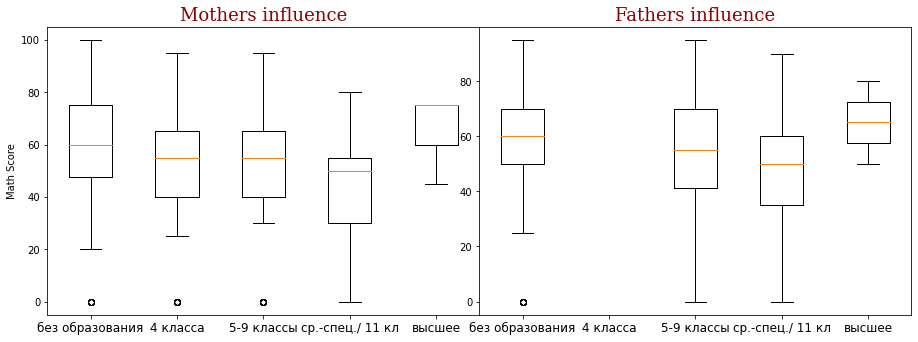

In [79]:
figure2=plt.figure()
fst_axes=figure2.add_axes([0,0,1,1])
snd_axes=figure2.add_axes([1,0,1,1])

fst_axes.boxplot([
            parent_ed_job[(parent_ed_job['Medu']=='высшее')]['score'],
            parent_ed_job[(parent_ed_job['Medu']=='ср.-спец./ 11 кл')]['score'],
            parent_ed_job[(parent_ed_job['Medu']=='5-9 классы')]['score'],
            parent_ed_job[(parent_ed_job['Medu']=='4 класса')]['score'],
            parent_ed_job[(parent_ed_job['Medu']=='без образования')]['score'],
            ])
font_t = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 18}
        
fst_axes.set_title('Mothers influence' ,fontdict=font_t)
fst_axes.set(xlabel='', ylabel='Math Score')
fst_axes.set_xticklabels(['без образования', '4 класса', '5-9 классы', 'ср.-спец./ 11 кл','высшее'], fontsize=12)

bp1=parent_ed_job[(parent_ed_job['Fedu']=='высшее')]['score'].values.tolist()
bp2=parent_ed_job[(parent_ed_job['Fedu']=='ср.-спец./ 11 кл')]['score'].values.tolist()
bp3=parent_ed_job[(parent_ed_job['Fedu']=='5-9 классы')]['score'].values.tolist()
bp4=parent_ed_job[(parent_ed_job['Fedu']=='4 класса')]['score'].values.tolist()
bp5=parent_ed_job[(parent_ed_job['Fedu']=='без образования')]['score'].values.tolist()

snd_axes.boxplot([bp1,bp2,bp3,bp4,bp5])

snd_axes.set_title('Fathers influence' ,fontdict=font_t)
snd_axes.set_xticklabels(['без образования', '4 класса', '5-9 классы', 'ср.-спец./ 11 кл','высшее'], fontsize=12)
           

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

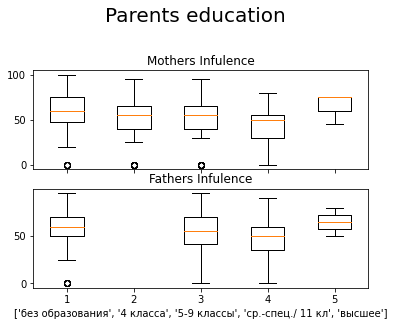

In [72]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Parents education', fontsize=20, y=1.1) 

ax1.boxplot([
            parent_ed_job[(parent_ed_job['Medu']=='высшее')]['score'],
            parent_ed_job[(parent_ed_job['Medu']=='ср.-спец./ 11 кл')]['score'],
            parent_ed_job[(parent_ed_job['Medu']=='5-9 классы')]['score'],
            parent_ed_job[(parent_ed_job['Medu']=='4 класса')]['score'],
            parent_ed_job[(parent_ed_job['Medu']=='без образования')]['score'],
            ])
ax1.set_title('Mothers Infulence')
ax1.label_outer()

ax2.boxplot([
            parent_ed_job[(parent_ed_job['Fedu']=='высшее')]['score'],
            parent_ed_job[(parent_ed_job['Fedu']=='ср.-спец./ 11 кл')]['score'],
            parent_ed_job[(parent_ed_job['Fedu']=='5-9 классы')]['score'],
            parent_ed_job[(parent_ed_job['Fedu']=='4 класса')]['score'],
            parent_ed_job[(parent_ed_job['Fedu']=='без образования')]['score'],
            ])
ax2.set_title('Fathers Infulence')
ax2.set_xlabel(['без образования', '4 класса', '5-9 классы', 'ср.-спец./ 11 кл','высшее'])
ax2.set_xlabel(['без образования', '4 класса', '5-9 классы', 'ср.-спец./ 11 кл','высшее'])
plt.show

# Я так и не поняла, почему он мне не хочет одну работу отца показывать

In [24]:
# Посмотрим, есть ли ученики, у которых образование обоих родителей:
# - Высшее
# - Без образования
sample_f_m_noedu=parent_ed_job[(parent_ed_job['Fedu']=='без образования')&(parent_ed_job['Medu']=='без образования')]['score']
sample_f_m_higher=parent_ed_job[(parent_ed_job['Fedu']=='высшее')&(parent_ed_job['Medu']=='без образования')]['score']
display(sample_f_m_noedu.shape)
display(sample_f_m_higher.shape)

(0,)

(0,)

In [30]:
#Тогда исследуем, чьё влияние сильнее: есть ли статистически значимая разница во влиянии образования отца или матери для категорий:
# - Высшее
sample_f_higher=parent_ed_job[(parent_ed_job['Fedu']=='высшее')]['score']
sample_m_higher=parent_ed_job[(parent_ed_job['Medu']=='высшее')]['score']

t_result1=stats.ttest_ind(sample_f_higher,sample_m_higher)
alpha=0.05
if(t_result[1]<alpha):
    print('Популяция студентов, у которых образование отца высшее отличается \n от популяции студентов, у которых образование матери высшее ')
else:
    print('Популяция студентов, у которых образование отца высшее НЕ отличается \n от популяции студентов, у которых образование матери высшее ') 

# - Без образования
sample_m_noedu =parent_ed_job[(parent_ed_job['Medu']=='без образования')]['score']
sample_f_noedu =parent_ed_job[(parent_ed_job['Fedu']=='без образования')]['score']

t_result2=stats.ttest_ind(sample_m_noedu,sample_f_noedu)
alpha=0.05
if(t_result2[1]<alpha):
    print('Популяция студентов, у которых у отца нет образования отличается \n от популяции студентов, у которых у матери нет образования ')
else:
    print('Популяция студентов, у которых у отца нет образования НЕ отличается \n от популяции студентов, у которых у матери нет образования ') 



Популяция студентов, у которых образование отца высшее НЕ отличается 
 от популяции студентов, у которых образование матери высшее 
Популяция студентов, у которых у отца нет образования НЕ отличается 
 от популяции студентов, у которых у матери нет образования 


#То есть не наблюдается какой-то разницы, у кого из родителей образование высшее, или нет образования.

# 11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа,

In [97]:
raw['reason'].isnull().sum()  # Данные содержат 17 пропущенных значений.

17

In [98]:
school_reason=raw.fillna(0)

In [99]:
school_reason=school_reason[['reason','address','score',]]

In [100]:
school_reason['reason'].value_counts()

course        137
home          104
reputation    103
other          34
0              17
Name: reason, dtype: int64

In [36]:
school_reason.groupby(['reason'])['score'].mean()

reason
0             50.588235
course        49.087591
home          49.711538
other         55.882353
reputation    55.097087
Name: score, dtype: float64

In [37]:
school_reason[school_reason['reason']=='course'].describe() # Причина выбора - образовательная программа

,score
count,137.000000
mean,49.087591
std,24.413856
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,95.000000


In [38]:
school_reason[school_reason['reason']=='home'].describe() # Причина выбора - близость к дому

,score
count,104.000000
mean,49.711538
std,25.041974
min,0.000000
25%,40.000000
50%,55.000000
75%,65.000000
max,95.000000


In [39]:
school_reason[school_reason['reason']=='reputation'].describe() # Причина выбора - репутация школы

,score
count,103.000000
mean,55.097087
std,22.151225
min,0.000000
25%,45.000000
50%,55.000000
75%,70.000000
max,100.000000


In [40]:
school_reason[school_reason['reason']=='other'].describe() # Причина выбора - какая-то другая

,score
count,34.000000
mean,55.882353
std,19.363766
min,0.000000
25%,46.250000
50%,55.000000
75%,65.000000
max,95.000000


Text(0, 0.5, 'Math Score')

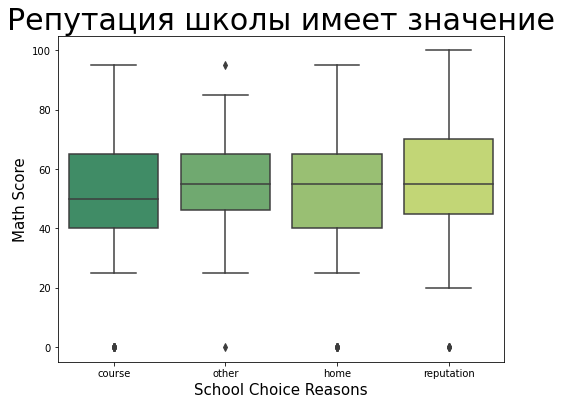

In [179]:
plt.figure(figsize=(8,6))

sch_choices=sns.boxplot(y='score', x='reason', data=school_reason[school_reason['reason']!=0], palette='summer')

sch_choices.set_title('Репутация школы имеет значение', fontsize=30)

sch_choices.set_xlabel('School Choice Reasons',fontdict={'fontsize':15})

sch_choices.set_ylabel('Math Score',fontdict={'fontsize':15})



In [88]:
#Сделаем выборку студентов, которые выбрали школу из-за репутации 
#и выборку других студентов и сравним, есть ли статистическая разница
sample_size=100
sample1= np.random.choice(school_reason[school_reason['reason']=='reputation']['score'],sample_size) 
sample2= np.random.choice(school_reason[(school_reason['reason']!='reputation')]['score'],sample_size) 
alpha=0.05

def compare_two_populations(sample1, sample2,alpha,sample_size):
    stat, p = ttest_ind(sample1,sample2)
   
    if p> alpha:
        print('популяции одинаковые, нулевую гипотезу опровергнуть не удалось')
    else:
        print('популяции отличаются, нулевую гипотезу опровергнуть удалось')
    return 

compare_two_populations(sample1, sample2,alpha,sample_size)

популяции отличаются, нулевую гипотезу опровергнуть удалось


#    То есть нам не показалось, что студенты, которые выбрали школу из-за её репутации, учатся лучше

Text(0.5, 1.1, 'Выбор школы имеет более выраженный эффект для ребят из дальних районов')

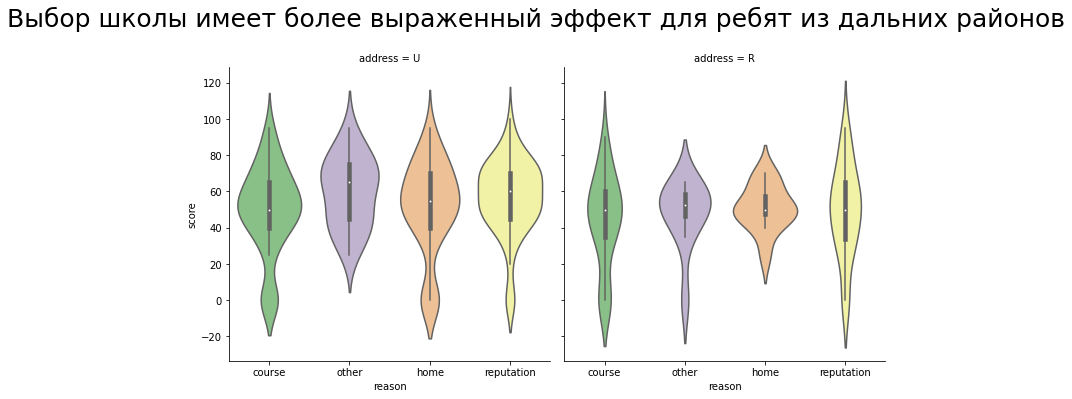

In [101]:
sch_choices1= sns.catplot(x='reason', y='score',col='address', col_wrap=2,
                          data=school_reason[(school_reason['reason']!=0) & (school_reason['address']!=0)],
                          kind="violin", palette='Accent') 

sch_choices1.fig.suptitle('Выбор школы имеет более выраженный эффект для ребят из дальних районов', y=1.1, fontsize=25)

# 12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)


In [3]:
raw['guardian'].isnull().sum()  # Данные содержат 31 пропущенных значений.

31

In [4]:
guardian=raw.fillna(0)
guardian=guardian[['guardian','Mjob','Fjob','score',]]
guardian['guardian'].value_counts()

mother    250
father     86
0          31
other      28
Name: guardian, dtype: int64

In [5]:
guardian.groupby(['guardian'])['score'].mean()

guardian
0         51.451613
father    53.430233
mother    52.180000
other     39.107143
Name: score, dtype: float64

In [6]:
guardian[guardian['guardian']=='mother'].describe() # Опекун - мама

,score
count,250.000000
mean,52.180000
std,23.837376
min,0.000000
25%,40.000000
50%,55.000000
75%,70.000000
max,100.000000


In [7]:
guardian[guardian['guardian']=='father'].describe() # Опекун - папа

,score
count,86.000000
mean,53.430233
std,22.664583
min,0.000000
25%,45.000000
50%,55.000000
75%,70.000000
max,90.000000


In [8]:
guardian[guardian['guardian']=='other'].describe() # Опекун - не родитель

,score
count,28.000000
mean,39.107143
std,27.757334
min,0.000000
25%,0.000000
50%,45.000000
75%,56.250000
max,90.000000


Text(0, 0.5, 'Math Score')

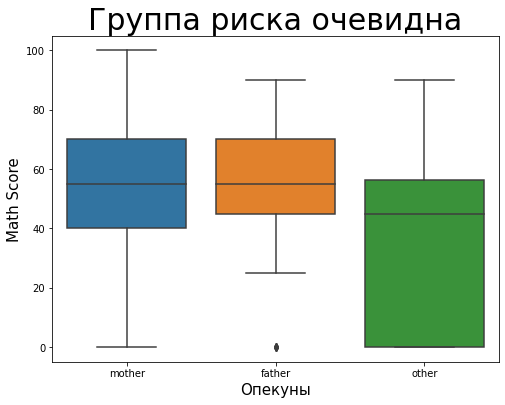

In [42]:
import seaborn as sns
plt.figure(figsize=(8,6))

guardian_plot=sns.boxplot(y='score', x='guardian', data=guardian[(guardian['guardian']!=0)])

guardian_plot.set_title('Группа риска очевидна', fontsize=30)

guardian_plot.set_xlabel('Опекуны',fontdict={'fontsize':15})

guardian_plot.set_ylabel('Math Score',fontdict={'fontsize':15})


[Text(0, 0, 'Матери'), Text(0, 0, 'Отцы'), Text(0, 0, 'Не родители')]

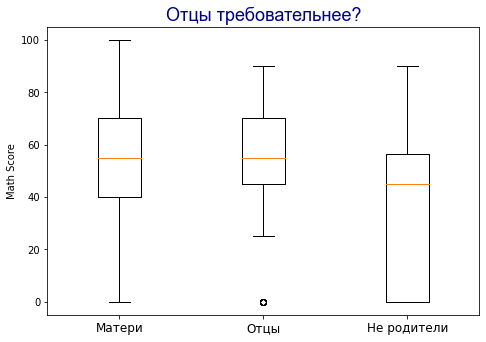

In [14]:
gp=plt.figure()
gp_axes=gp.add_axes([0,0,1,1])

gp1=guardian[(guardian['guardian']=='mother')]['score']
gp2=guardian[(guardian['guardian']=='father')]['score']
gp3=guardian[(guardian['guardian']=='other')]['score']

gp_axes.boxplot([gp1,gp2,gp3])
font_t = {'family': 'arial',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 18}
        
gp_axes.set_title('Отцы требовательнее?' ,fontdict=font_t)
gp_axes.set(xlabel='', ylabel='Math Score')
gp_axes.set_xticklabels(['Матери', 'Отцы', 'Не родители'], fontsize=12)


Text(0.5, 1.1, 'Мамы-опекуны по профессиям')

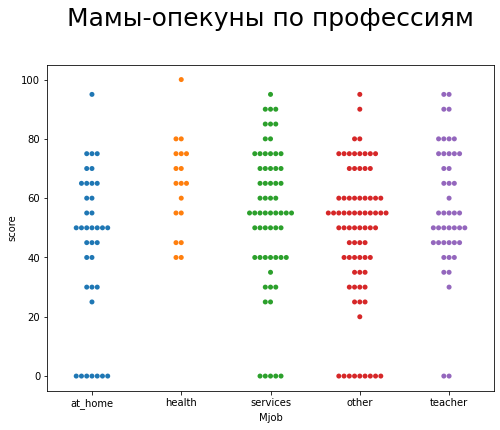

In [41]:
plt.figure(figsize=(8,6))

guard_plot1 = sns.swarmplot(
                            x='Mjob', y='score', 
                           data=guardian[(guardian['guardian']=='mother') & (guardian['Mjob']!=0)]
                          ) 
guard_plot1.set_title('Мамы-опекуны по профессиям', y=1.1, fontsize=25)

#Рассматривать отцов отцов не будем, мало данных

# 24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)


In [53]:
raw['famrel'].isnull().sum()  # Данные содержат 27 пропущенных значений.

27

In [54]:
fam_rel=raw.fillna(0)
fam_rel=fam_rel[['guardian','famrel','famsize','age','score',]]
fam_rel['famrel'].value_counts()   #Данные содержат одну ошибку

 4.0    178
 5.0     97
 3.0     62
 0.0     27
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

In [55]:
#Правим ошибку ввода в образовании отца
fam_rel.famrel=fam_rel['famrel'].apply(lambda x: 1.0 if str(x)=='-1.0' else x)

In [57]:
fam_rel['famrel'].value_counts()  #Ошибка исправлена

4.0    182
5.0     99
3.0     62
0.0     27
2.0     17
1.0      8
Name: famrel, dtype: int64

In [58]:
fam_rel.groupby(['famrel'])['score'].mean() # Как ни странно, явной зависимости от уровня отношений, не наблюдается

famrel
0.0    51.296296
1.0    53.125000
2.0    48.529412
3.0    51.451613
4.0    50.439560
5.0    53.787879
Name: score, dtype: float64

Text(0.5, 1.1, 'зависимости между отношениями в семье и размером семьи и влияния их на успеваемость не замечено ')

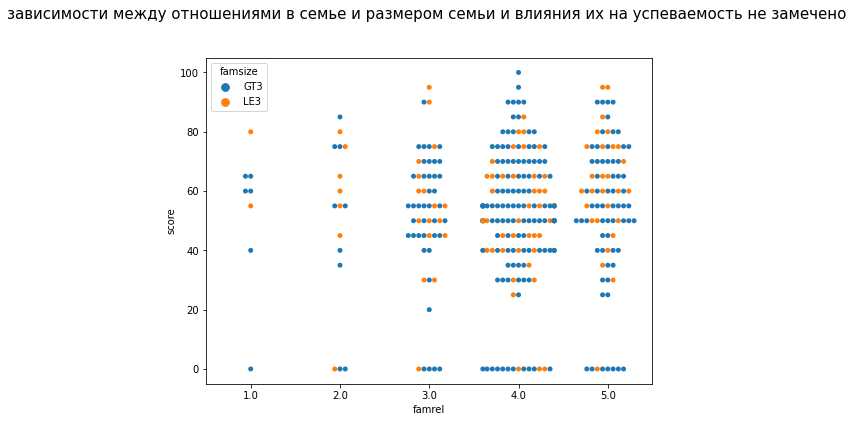

In [60]:
plt.figure(figsize=(8,6))

guard_plot1 = sns.swarmplot(
                            x='famrel', y='score', hue='famsize',
                           data=fam_rel[(fam_rel['famrel']!=0) & (fam_rel['famsize']!=0)]
                          ) 
guard_plot1.set_title('зависимости между отношениями в семье и размером семьи и влияния их на успеваемость не замечено ', y=1.1, fontsize=15)

In [60]:
# попробуем посмотреть на зависисмоть оценки отношений в семье от возраста
# Вспомним, что ранее наблюдалось снижение успеваемости с возрастом.


fam_rel.groupby(['age'])['famrel'].mean()

age
15    3.597561
16    3.788462
17    3.561224
18    3.646341
19    3.708333
20    5.000000
21    5.000000
22    5.000000
Name: famrel, dtype: float64

In [61]:
# Прослеживается зависимость между возрастом и уровнем средней оценки отношений в семье: 
#чем старше ученик, тем хуже средняя оценка состояния отношений в семье

In [61]:
fam_rel.corr()  #Хотя корреляция получается слабая...

,famrel,age,score
famrel,1.000000,0.026372,0.043641
age,0.026372,1.000000,-0.155726
score,0.043641,-0.155726,1.000000


In [64]:
fam_rel['age'].value_counts(sort=False)

15     82
16    103
17     98
18     80
19     21
20      3
21      1
22      1
Name: age, dtype: int64

In [65]:
#Убедимся статистически
#нулевая гипотеза: с возрастом ученика оценка семейных отношний не ухудшается
# 15  и 6 лет
sample_size=80
sample1= np.random.choice(fam_rel[fam_rel['age']==15]['famrel'],sample_size) 
sample2= np.random.choice(fam_rel[fam_rel['age']==16]['famrel'],sample_size) 
alpha=0.05


compare_two_populations(sample1, sample2,alpha,sample_size)

популяции одинаковые, нулевую гипотезу опровергнуть не удалось


In [66]:
# 16  и 17 лет
sample_size=90
sample1= np.random.choice(fam_rel[fam_rel['age']==16]['famrel'],sample_size) 
sample2= np.random.choice(fam_rel[fam_rel['age']==17]['famrel'],sample_size) 
alpha=0.05


compare_two_populations(sample1, sample2,alpha,sample_size)

популяции одинаковые, нулевую гипотезу опровергнуть не удалось


In [67]:
# 17  и 18 лет
sample_size=80
sample1= np.random.choice(fam_rel[fam_rel['age']==17]['famrel'],sample_size) 
sample2= np.random.choice(fam_rel[fam_rel['age']==18]['famrel'],sample_size) 
alpha=0.05


compare_two_populations(sample1, sample2,alpha,sample_size)

популяции одинаковые, нулевую гипотезу опровергнуть не удалось


In [68]:
#Вот подтверждение того, что по средним значениям о зависимости между выборками судить нельзя.

# 13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [104]:
raw['traveltime'].isnull().sum()  # Данные содержат 28 пропущенных значений.

28

In [105]:
traveltime=raw.fillna(0)
traveltime=traveltime[['traveltime','address','score',]]
traveltime['traveltime'].value_counts()   

1.0    242
2.0     96
0.0     28
3.0     22
4.0      7
Name: traveltime, dtype: int64

In [58]:
traveltime.groupby(['traveltime'])['score'].mean() #По средним значениям явной зависимости не видно

traveltime
0.0    47.678571
1.0    52.913223
2.0    50.677083
3.0    44.318182
4.0    50.000000
Name: score, dtype: float64

Text(0.5, 1.1, 'На диаграмме зависимость лучших результатов от меньшего времени в пути до школы очевидна')

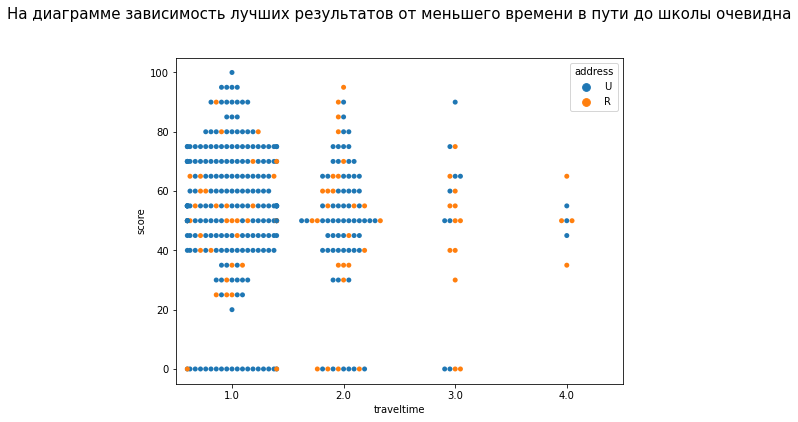

In [62]:
plt.figure(figsize=(8,6))

travel_time = sns.swarmplot(
                            x='traveltime', y='score', hue='address',
                           data=traveltime[(traveltime['traveltime']>0) & (traveltime['address']!=0)]
                          ) 
travel_time.set_title('На диаграмме зависимость лучших результатов от меньшего времени в пути до школы очевидна', y=1.1, fontsize=15)

In [108]:
#Убедимся статистически
#нулевая гипотеза: ученики, воторые тратят миниум времени на путь в школу учатся так же, как и другие
sample_size=100
sample1= np.random.choice(traveltime[traveltime['traveltime']==1]['score'],sample_size) 
sample2= np.random.choice(traveltime[traveltime['traveltime']>1]['score'],sample_size) 
alpha=0.05


compare_two_populations(sample1, sample2,alpha,sample_size)

популяции одинаковые, нулевую гипотезу опровергнуть не удалось


# 14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [64]:
raw['studytime'].isnull().sum()  # Данные содержат 7 пропущенных значений.

7

In [73]:
study_time=raw.fillna(0)
study_time=study_time[['studytime','reason','score',]]
study_time['studytime'].value_counts()   

2.0    194
1.0    103
3.0     64
4.0     27
0.0      7
Name: studytime, dtype: int64

In [67]:
study_time.groupby(['studytime'])['score'].mean() #Судя по средним значениям, зависимоть практически линейная

studytime
0.0    67.142857
1.0    49.466019
2.0    49.510309
3.0    56.875000
4.0    56.296296
Name: score, dtype: float64

[Text(0, 0.5, 'Math Score'), Text(0.5, 0, 'Время, потраченное на учёбу')]

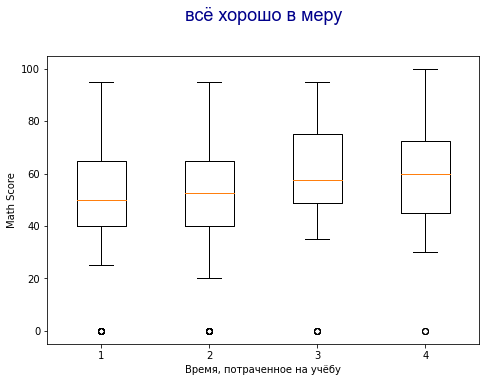

In [72]:
tt=plt.figure()
tt_axes=tt.add_axes([0,0,1,1])

tt1=study_time[(study_time['studytime']==1.0)]['score']
tt2=study_time[(study_time['studytime']==2.0)]['score']
tt3=study_time[(study_time['studytime']==3.0)]['score']
tt4=study_time[(study_time['studytime']==4.0)]['score']

tt_axes.boxplot([tt1,tt2,tt3,tt4])
font_t = {'family': 'arial',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 18}
        
tt_axes.set_title('всё хорошо в меру' ,fontdict=font_t, y=1.1)
tt_axes.set(xlabel='Время, потраченное на учёбу', ylabel='Math Score')


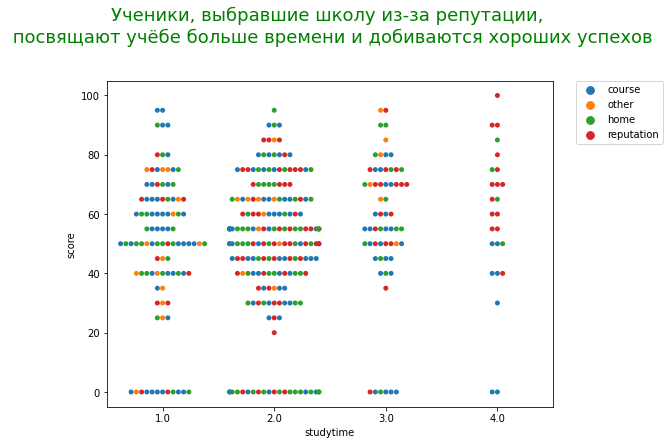

In [87]:
plt.figure(figsize=(8,6))

study_time_plot = sns.swarmplot(
                            x='studytime', y='score', hue='reason',
                           data=study_time[(study_time['studytime']>0) & (study_time['reason']!=0)]
                          ) 
study_time_plot.set_title('Ученики, выбравшие школу из-за репутации, \n посвящают учёбе больше времени и добиваются хороших успехов', y=1.1, fontsize=18,color='green')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)


# 15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

In [98]:
raw['failures'].isnull().sum()  # Данные содержат 22 пропущенных значений.

22

In [99]:
fails=fails[['failures','score',]]
fails['failures'].value_counts()  

0.0    315
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

In [ ]:
#fails=raw.fillna(0)

In [100]:
fails.groupby(['failures'])['score'].mean() # Неудачи в прошлом - хороший предиктор

failures
0.0    55.587302
1.0    39.183673
2.0    30.312500
3.0    27.666667
Name: score, dtype: float64

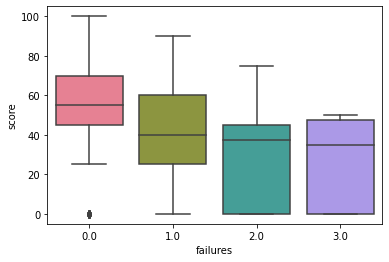

In [101]:
sns.boxplot(y='score', x='failures', data=fails, palette='husl')

# 16 schoolsup — дополнительная образовательная поддержка (yes или no)

In [103]:
raw['schoolsup'].isnull().sum()  # Данные содержат  9 пропущенных значений.

9

In [104]:
sch_support=raw.fillna(0)
sch_support=sch_support[['schoolsup','failures','score',]]
sch_support['schoolsup'].value_counts()  

no     335
yes     51
0        9
Name: schoolsup, dtype: int64

In [105]:
sch_support.groupby(['schoolsup'])['score'].mean() 

schoolsup
0      48.888889
no     52.492537
yes    45.196078
Name: score, dtype: float64

Text(0.5, 1.1, 'Ученики, у которых были неудачи, не получали поддержки со стороны школы!')

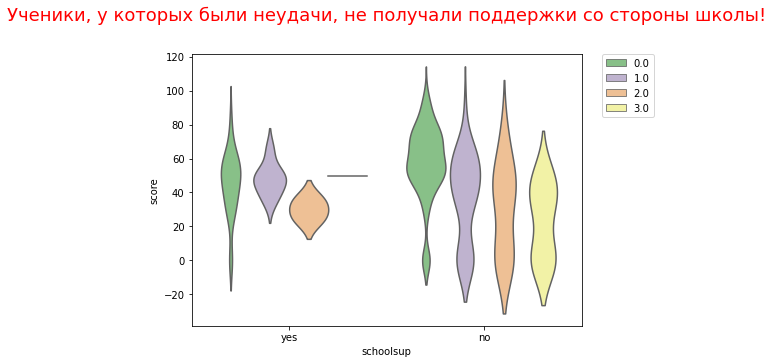

In [120]:
plt.figure(figsize=(7,5))

success_plot = sns.violinplot(x="schoolsup", y="score", hue='failures',
                              data=sch_support[sch_support['schoolsup']!=0], 
                              inner=None, palette='Accent')

success_plot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
success_plot.set_title('Ученики, у которых были неудачи, не получали поддержки со стороны школы!', y=1.1, fontsize=18,color='red')

# 17 famsup — семейная образовательная поддержка (yes или no)

In [62]:
raw['famsup'].isnull().sum()  # Данные содержат  39 пропущенных значений.

39

In [63]:
f_support=raw.fillna(0)
f_support=f_support[['famsup','schoolsup','failures','score']]
f_support['famsup'].value_counts()  

yes    219
no     137
0       39
Name: famsup, dtype: int64

In [64]:
f_support.groupby(['famsup'])['score'].mean() 

famsup
0      54.615385
no     51.313869
yes    51.004566
Name: score, dtype: float64

Text(0.5, 1.1, 'Какая поддрежка доходит до адресата')

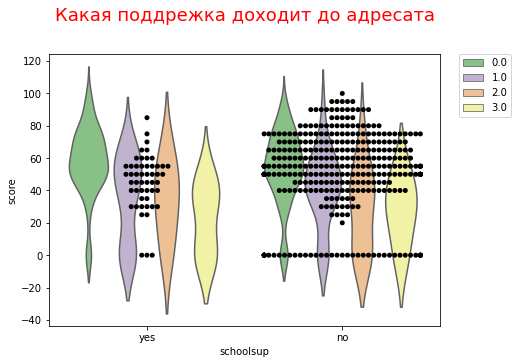

In [67]:
plt.figure(figsize=(7,5))


f_support_plot = sns.violinplot(x="famsup", y="score", hue='failures',
                              data=f_support[f_support['famsup']!=0], 
                              inner=None, palette='Accent')

f_support_plot = sns.swarmplot(x="schoolsup", y="score", data=f_support[f_support['schoolsup']!=0],
                          color="black", edgecolor="gray")

f_support_plot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
f_support_plot.set_title('Какая поддрежка доходит до адресата', y=1.1, fontsize=18,color='red')

#Чёрные точки - успеваемость студентов, которые не получали (или не получали) поддержки от Школы 
#скрипочки - успеваемость студентов, которые получали (или не получали) семейную поддержку 
#разделённые по категорям неудач. Как видно, семейная образовательная поддержка более эффективна

# 18 paid — дополнительные платные занятия по математике (yes или no)

In [68]:
raw['paid'].isnull().sum()  # Данные содержат  40 пропущенных значений.

40

In [69]:
paid_tutoring=raw.fillna(0)
paid_tutoring=paid_tutoring[['paid','famsup','schoolsup','failures','score']]
paid_tutoring['paid'].value_counts()  

no     200
yes    155
0       40
Name: paid, dtype: int64

In [70]:
paid_tutoring.groupby(['paid'])['score'].mean() 

paid
0      49.875000
no     49.600000
yes    54.290323
Name: score, dtype: float64

In [71]:
#Сколько студентов, у которых в прошлом были неудачи в учёбе, обратились к услугам репетиторов:

paid_tutoring[paid_tutoring['failures']>0].groupby(['paid'])['score'].count() 

paid
0       7
no     55
yes    18
Name: score, dtype: int64

In [76]:
#Сравним, насколько это обращение оказалось эффективным.

#Успеваемость учеников, имеющих неудачи в прошлом, которые обращались к репетиторам:

paid_tutoring[(paid_tutoring['failures']>0) & (paid_tutoring['paid']=='yes')].describe()


,failures,score
count,18.000000,18.000000
mean,1.500000,41.666667
std,0.618347,19.402850
min,1.000000,0.000000
25%,1.000000,40.000000
50%,1.000000,42.500000
75%,2.000000,50.000000
max,3.000000,75.000000


In [77]:
#Успеваемость учеников, имеющих неудачи в прошлом, которые НЕ обращались к репетиторам:

paid_tutoring[(paid_tutoring['failures']>0) & (paid_tutoring['paid']=='no')].describe()

,failures,score
count,55.000000,55.000000
mean,1.563636,33.181818
std,0.811118,25.844328
min,1.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,40.000000
75%,2.000000,50.000000
max,3.000000,90.000000


In [80]:
#Успеваемость учеников, имеющих неудачи в прошлом, которые обращались к репетиторам:

paid_tutoring[(paid_tutoring['failures']==0) & (paid_tutoring['paid']=='yes')].describe()

,failures,score
count,137.0,137.000000
mean,0.0,55.948905
std,0.0,19.745931
min,0.0,0.000000
25%,0.0,45.000000
50%,0.0,55.000000
75%,0.0,70.000000
max,0.0,95.000000


In [79]:
#Успеваемость учеников, не имеющих неудачи в прошлом, которые НЕ обращались к репетиторам:

paid_tutoring[(paid_tutoring['failures']==0) & (paid_tutoring['paid']=='no')].describe()

,failures,score
count,145.0,145.000000
mean,0.0,55.827586
std,0.0,23.370609
min,0.0,0.000000
25%,0.0,45.000000
50%,0.0,55.000000
75%,0.0,70.000000
max,0.0,100.000000


#Вывод: эффективность вмешательства репетитора заметна только для учеников, имевших неуспеваемость в прошлом

# 19 activities — дополнительные внеучебные занятия (yes или no)

In [83]:
raw['activities'].isnull().sum()  # Данные содержат  14 пропущенных значений.

14

In [84]:
extra_curr=raw.fillna(0)
extra_curr=extra_curr[['studytime','activities','score']]
extra_curr['activities'].value_counts() 

yes    195
no     186
0       14
Name: activities, dtype: int64

In [86]:
extra_curr.groupby(['activities'])['score'].mean() #Разницы не заметно

activities
0      47.500000
no     51.344086
yes    51.871795
Name: score, dtype: float64

In [89]:
#Убедимся, есть ли статистическая разница в успеваемости учеников, имеющих дополнительные внеучебные занятия, и не имеющих
#Нулевая гипотеза: нет разницы

sample_size=180
sample1= np.random.choice(extra_curr[extra_curr['activities']=='yes']['score'],sample_size) 
sample2= np.random.choice(extra_curr[extra_curr['activities']=='no']['score'],sample_size)
alpha=0.05

def compare_two_populations(sample1, sample2,alpha,sample_size):
    stat, p = ttest_ind(sample1,sample2)
   
    if p> alpha:
        print('популяции одинаковые, нулевую гипотезу опровергнуть не удалось')
    else:
        print('популяции отличаются, нулевую гипотезу опровергнуть удалось')
    return 

compare_two_populations(sample1, sample2,alpha,sample_size)

популяции одинаковые, нулевую гипотезу опровергнуть не удалось


Text(0.5, 1.1, 'Как ученики распоряжаются временем')

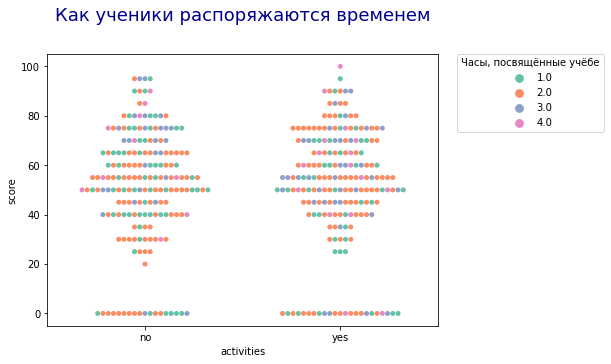

In [107]:
plt.figure(figsize=(7,5))

after_school = sns.swarmplot(x="activities", y="score", hue='studytime',
                              data=extra_curr[(extra_curr['activities']!=0) & extra_curr['studytime']!=0], 
                                palette='Set2')

after_school.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Часы, посвящённые учёбе')
after_school.set_title('Как ученики распоряжаются временем', y=1.1, fontsize=18,color='darkblue')

In [99]:
#Чёткой зависимости между дополнительными внеучебными занятиями в ременем, которое тратят на занятия ученики, 
#на визуализации прослеживается

#Давайте убедимся
#нулевая гипотеза: ученики, у которых есть внеклассные заняти и те, которые не заняты на дополнительных занятиях,
#посвящают занятиям одинаковое время

sample_size=180
sample1= np.random.choice(extra_curr[extra_curr['activities']=='yes']['studytime'],sample_size) 
sample2= np.random.choice(extra_curr[extra_curr['activities']=='no']['studytime'],sample_size)
alpha=0.05

compare_two_populations(sample1, sample2,alpha,sample_size)


популяции отличаются, нулевую гипотезу опровергнуть удалось


In [100]:
# Всё-таки, студенты, у которых есть дополнительные внеучебные занятия, затрачивают другое время нd учёбу.

# Сколько времени на учёбу тратят ученикии, которые имеют дополнительные занятия:
extra_curr[extra_curr['activities']=='yes']['studytime'].describe()

count    195.000000
mean       2.082051
std        0.910101
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: studytime, dtype: float64

In [101]:
# Сколько времени на учёбу тратят ученикии, которые НЕ имеют дополнительных занятий:
extra_curr[extra_curr['activities']=='no']['studytime'].describe()

count    186.000000
mean       1.930108
std        0.832097
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

#Ученики, у которых есть дополнительные внеучебные занятия, затрачивают больше времени не учёбу, но на успеваемости это не сказывается

# 20 nursery — посещал детский сад (yes или no)

In [109]:
raw['nursery'].isnull().sum()  # Данные содержат  16 пропущенных значений.

16

In [110]:
nursery=raw.fillna(0)
nursery=nursery[['nursery','score']]
nursery['nursery'].value_counts() 

yes    300
no      79
0       16
Name: nursery, dtype: int64

In [111]:
nursery.groupby(['nursery'])['score'].mean() 

nursery
0      46.875000
no     48.734177
yes    52.433333
Name: score, dtype: float64

In [112]:
# Как учатся ученики, которые посещали детский сад:
nursery[nursery['nursery']=='yes']['score'].describe()

count    300.000000
mean      52.433333
std       23.238884
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

In [113]:
# Как учатся ученики, которые НЕ посещали детский сад:
nursery[nursery['nursery']=='no']['score'].describe()

count    79.000000
mean     48.734177
std      23.567529
min       0.000000
25%      40.000000
50%      55.000000
75%      62.500000
max      90.000000
Name: score, dtype: float64

In [ ]:
# Учатся лучше.

#

# 21 higher — хочет получить высшее образование (yes или no)

In [115]:
raw['higher'].isnull().sum()  # Данные содержат  20 пропущенных значений.

20

In [117]:
plans=raw.fillna(0)
plans=plans[['higher','Medu','Fedu','score']]
plans['higher'].value_counts() 

yes    356
0       20
no      19
Name: higher, dtype: int64

In [ ]:
#Нестолько подавляющее большинство планирую учиться в вузе, что даже исследовать дальше нечего.

In [118]:
plans.groupby(['higher'])['score'].mean() 

higher
0      55.250000
no     33.684211
yes    52.205056
Name: score, dtype: float64

In [ ]:
# Всё понятно.

#
# 22 internet — наличие интернета дома (yes или no)

In [126]:
raw['internet'].isnull().sum()  # Данные содержат  34 пропущенных значений.

34

In [138]:
internet=raw.fillna(0)
internet=internet[['internet','address','score']]
internet['internet'].value_counts() 

yes    305
no      56
0       34
Name: internet, dtype: int64

In [134]:
internet.groupby(['internet'])['score'].mean() 

internet
0      49.852941
no     48.214286
yes    52.245902
Name: score, dtype: float64

Text(0.5, 1.1, 'Интернет в городе и в деревне и влияние на учёбу')

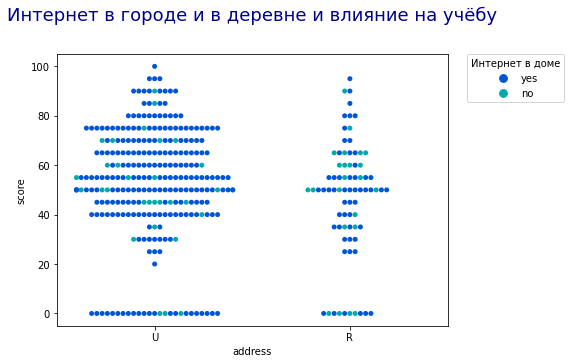

In [135]:
plt.figure(figsize=(7,5))

internet = sns.swarmplot(x="address", y="score", hue='internet',
                              data=internet[(internet['internet']!=0) & (internet['address']!=0)], 
                                palette='winter')

internet.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Интернет в доме')
internet.set_title('Интернет в городе и в деревне и влияние на учёбу', y=1.1, fontsize=18,color='darkblue')

Text(0.5, 1.1, 'Интернет в городе и в деревне и влияние на учёбу')

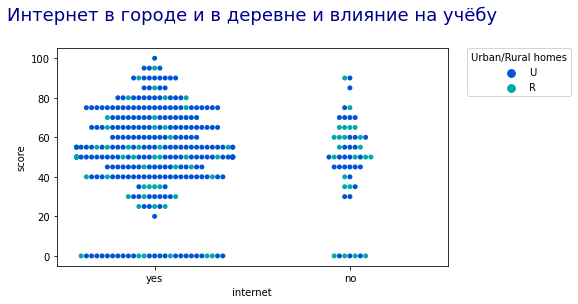

In [141]:
plt.figure(figsize=(7,4))

internet1 = sns.swarmplot(x="internet", y="score", hue='address',
                              data=internet[(internet['internet']!=0) & (internet['address']!=0)], 
                                palette='winter')

internet1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Urban/Rural homes')
internet1.set_title('Интернет в городе и в деревне и влияние на учёбу', y=1.1, fontsize=18,color='darkblue')

In [ ]:
#Короче, интернет учёбе не мемшает, в городе большая часть учеников имеет интернет, чем в сельской местности.

# 23 romantic — в романтических отношениях (yes или no)

In [143]:
raw['romantic'].isnull().sum()  # Данные содержат  34 пропущенных значений.

31

In [145]:
realtionship=raw.fillna(0)
realtionship=realtionship[['romantic','sex','age','score']]
realtionship['romantic'].value_counts() 

no     240
yes    124
0       31
Name: romantic, dtype: int64

In [146]:
realtionship.groupby(['romantic'])['score'].mean() 

romantic
0      52.903226
no     53.437500
yes    47.298387
Name: score, dtype: float64

In [150]:
#Как учатся ученики, имеющие романтические отношения
realtionship[realtionship['romantic']=='yes'].describe()

,age,score
count,124.000000,124.000000
mean,16.983871,47.298387
std,1.294038,24.836041
min,15.000000,0.000000
25%,16.000000,40.000000
50%,17.000000,55.000000
75%,18.000000,65.000000
max,22.000000,90.000000


In [152]:
#Как учатся ученики, не имеющие романтических отношений. Заметим возрастную статистику: эта популяция немного младше
realtionship[realtionship['romantic']=='no'].describe()

,age,score
count,240.000000,240.000000
mean,16.595833,53.437500
std,1.247249,23.245017
min,15.000000,0.000000
25%,16.000000,45.000000
50%,16.000000,55.000000
75%,17.000000,70.000000
max,21.000000,100.000000


In [155]:
#Две трети находящихся в романтических отношениях - девушки
realtionship[realtionship['romantic']=='yes'].groupby('sex')['sex'].count()

sex
F    78
M    46
Name: sex, dtype: int64

Text(0.5, 1.1, 'Девушкам романтические отношения мешают больше')

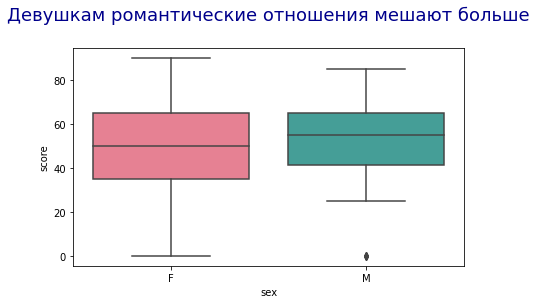

In [158]:
plt.figure(figsize=(7,4))

rom_rel=sns.boxplot(y='score', x='sex', data=realtionship[realtionship['romantic']=='yes'], palette='husl')

rom_rel.set_title('Девушкам романтические отношения мешают больше', y=1.1, fontsize=18,color='darkblue')

# 25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

In [160]:
raw['freetime'].isnull().sum()  # Данные содержат  11 пропущенных значений.

11

In [162]:
free_time=raw.fillna(0)
free_time=free_time[['freetime','studytime','activities','score']]
free_time['freetime'].value_counts() 

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
0.0     11
Name: freetime, dtype: int64

In [163]:
free_time.groupby(['freetime'])['score'].mean() #Чёткой зависимости не видно

freetime
0.0    47.272727
1.0    48.333333
2.0    57.539683
3.0    48.627451
4.0    51.696429
5.0    54.868421
Name: score, dtype: float64

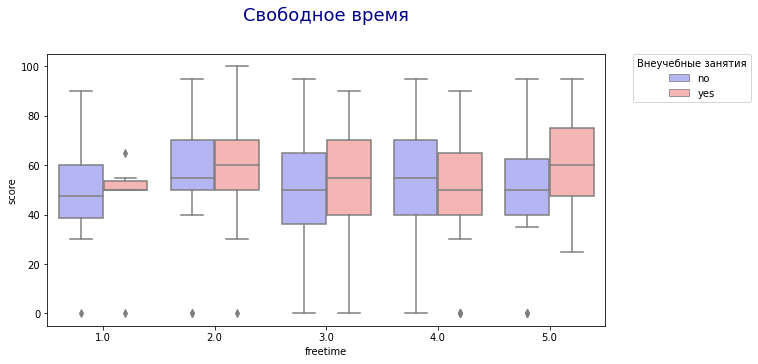

In [169]:
plt.figure(figsize=(10,5))

time=sns.boxplot(y='score', x='freetime', hue='activities', 
                 data=free_time[(free_time['freetime']!=0) & (free_time['activities']!=0)], 
                 palette='bwr')

time.set_title('Свободное время', y=1.1, fontsize=18,color='darkblue')
time.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Внеучебные занятия')

In [172]:
# В ряде случаев ученики, которые посвящают свободное вермя внеурочным занятиям, учатся лучше.
#Особенно это заметно на примере учеников, у которых много свободного времени. 
#Тот, кто в свободное вермя ничего не делает, и в учёбе тоже не преуспевает.

# 26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

In [173]:
raw['goout'].isnull().sum()  # Данные содержат  8 пропущенных значений.


8

In [3]:
partying=raw.fillna(0)
partying=partying[['freetime','romantic','studytime','goout','score']]
partying['goout'].value_counts(sort=False) 


4.0     84
3.0    127
2.0    101
1.0     23
5.0     52
0.0      8
Name: goout, dtype: int64

In [180]:
partying.groupby(['goout'])['score'].mean() # Всё хорошо в меру


goout
0.0    38.750000
1.0    49.347826
2.0    55.990099
3.0    54.724409
4.0    47.738095
5.0    43.653846
Name: score, dtype: float64

In [181]:
#Тестируется нулевая гипотеза: Ученики, находящиеся в романтических отношениях, ходят на вечеринки не чаще, чем другие.

sample_size=100
sample1= np.random.choice(partying[partying['romantic']=='yes']['goout'],sample_size) 
sample2= np.random.choice(partying[partying['romantic']=='no']['goout'],sample_size)
alpha=0.05

compare_two_populations(sample1, sample2,alpha,sample_size)

популяции одинаковые, нулевую гипотезу опровергнуть не удалось


In [199]:
# Ну и пусть ходят.

# 27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

In [15]:
raw['health'].isnull().sum()  # Данные содержат  15 пропущенных значений.

15

In [16]:
health=raw.fillna(0)
health=health[['health','score']]
health['health'].value_counts(sort=False) 


3.0     89
5.0    138
1.0     47
2.0     43
4.0     63
0.0     15
Name: health, dtype: int64

In [17]:
health.groupby(['health'])['score'].mean() # А это точно от 1 - очень плохо до 5 - очень хорошо?


health
0.0    45.000000
1.0    59.361702
2.0    51.395349
3.0    50.056180
4.0    48.412698
5.0    51.811594
Name: score, dtype: float64

In [ ]:
# Да ну, странные какие-то данные. Кто и по каким критериям выставлял оценку здоровья? Насколько данные reliable?

#
# 28 absences — количество пропущенных занятий

In [70]:
raw['absences'].isnull().sum()  # Данные содержат  12 пропущенных значений.

11

In [71]:
attendance=raw.fillna(0)
attendance=attendance[['absences','score']]
attendance['absences'].describe()


count    389.000000
mean       7.113111
std       23.310047
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

In [35]:
attendance['absences'].unique()

array([  6.,   4.,  10.,   2.,   0.,  16.,  14.,   7.,   8.,  25.,  12.,
        54.,  18.,  26.,  20.,  56.,  24.,  28.,   5.,  13.,  15.,  22.,
         3., 385.,  21.,   1.,  75.,  30.,  19.,   9.,  11.,  38.,  40.,
        23.,  17., 212.])

In [ ]:
#Вижу только два верних выброса, их легче удалить и не заморачиваться

In [37]:
attendance[attendance['absences']>200]

,absences,score
222,385.0,85.0
390,212.0,45.0


In [39]:
attendance.drop(index=222,inplace=True) 
attendance.drop(index=390,inplace=True) 

In [40]:
attendance['absences'].describe()

count    393.000000
mean       5.575064
std        8.025157
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

In [82]:
bins = pd.IntervalIndex.from_tuples([(0, 3), (3, 5), (5, 10),(10, 25),(25, 75)])
attendance['absences'].value_counts(normalize=True, bins=bins,sort=False)

(0, 3]      0.180662
(3, 5]      0.147583
(5, 10]     0.198473
(10, 25]    0.139949
(25, 75]    0.020356
Name: absences, dtype: float64

In [54]:
attendance.corr()

,absences,score
absences,1.000000,0.031738
score,0.031738,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

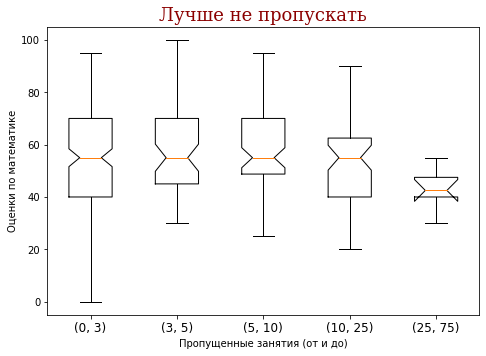

In [74]:
figure28=plt.figure()
attendance_axes=figure28.add_axes([0,0,1,1])

att_plot1=attendance[attendance['absences']<=3]['score']
att_plot2=attendance[(attendance['absences']>3) & (attendance['absences']<=5)]['score']
att_plot3=attendance[(attendance['absences']>5) & (attendance['absences']<=10)]['score']
att_plot4=attendance[(attendance['absences']>10) & (attendance['absences']<=25)]['score']
att_plot5=attendance[(attendance['absences']>25) & (attendance['absences']<=75)]['score']

attendance_axes.boxplot([att_plot1,att_plot2,att_plot3,att_plot4,att_plot5],notch=True)

font_t = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 18}
        
attendance_axes.set_title('Лучше не пропускать' ,fontdict=font_t)
attendance_axes.set(xlabel='Пропущенные занятия (от и до)', ylabel='Оценки по математике')
attendance_axes.set_xticklabels(['(0, 3)', '(3, 5)', '(5, 10)','(10, 25)','(25, 75)'], fontsize=12)
           
plt.show

# Выводы

In [ ]:
# Самыми значимыми факторами, влияющими на успех учёбы в приведенных данных были:
# - отсутствие родителей;
# - история прошлых неудач;
# - проживание в отдалённых от города районах;
# - замотивированность учеников:
#                                - ученики, которые выбирали школу по репутации показали результаты заметно лучше;
#                                - желающие получить высшее образование тоже.
# - семейная образовательная поддержка.